<a href="https://colab.research.google.com/github/PaulToronto/Hands-on-Maching-Learning-Book/blob/main/2_End_to_End_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 - End-to-End Machine Learning Project

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [2]:
data_url = 'https://drive.google.com/file/d/1s-Tk1H2u4UUAzYeCzZIkP1zRwbm3J5b4/view?usp=sharing'
data_url ='https://drive.google.com/uc?id=' + data_url.split('/')[-2]

housing = pd.read_csv(data_url) 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Take a Quick Look at the Data Structure

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### The distributions of numerical features

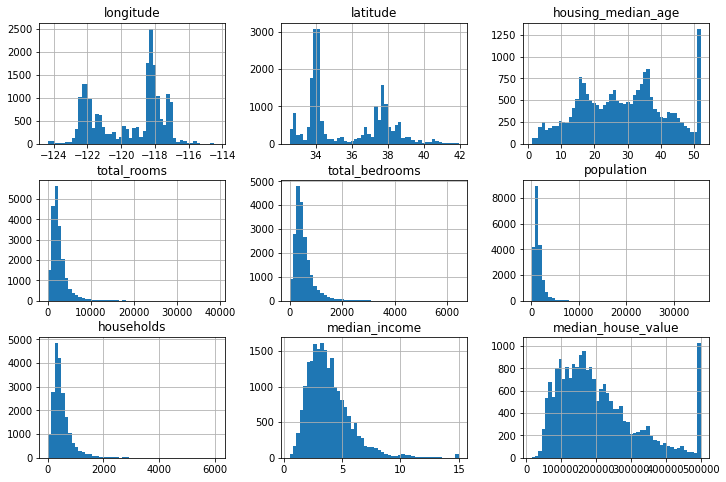

In [6]:
housing.hist(bins=50, figsize=(12, 8));

## `train_test_split()`

In [7]:
train_set, test_set = train_test_split(housing, 
                                       test_size=0.2, 
                                       random_state=42)

In [8]:
housing.shape, train_set.shape, test_set.shape

((20640, 10), (16512, 10), (4128, 10))

### `pd.cut()`

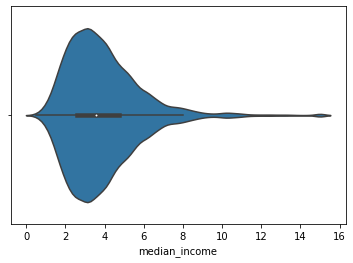

In [9]:
sns.violinplot(data=housing, x='median_income');

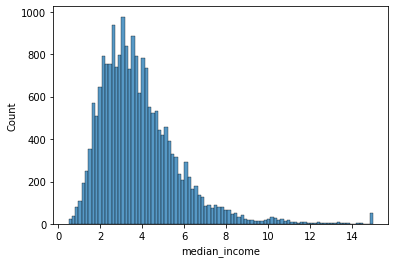

In [10]:
sns.histplot(data=housing, x='median_income');

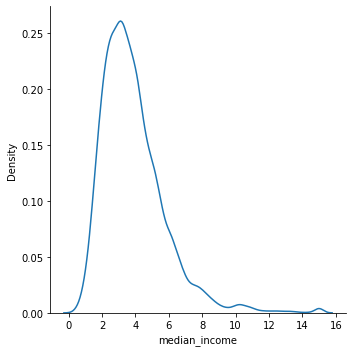

In [11]:
sns.displot(data=housing, x='median_income', kind='kde');

- most median income value are clustered around 1.5 to 6 (15K to 60K)
- some median incomes go way beyond that
- it is important to have a sufficient number off instances for each stratum or else the estimate of the stratum's importancemay be biased
    - so there should not be too many strata and each stratum should be large enough

In [12]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6.0, np.nan],
                               labels=[1, 2, 3, 4, 5])

In [13]:
total_size = 0
for cat in sorted(housing['income_cat'].unique()):
    median_income = housing[housing['income_cat'] == cat]['median_income']
    print('category: ', cat)
    print('category size: ', len(median_income))
    total_size += len(median_income)
    print('min: ', median_income.min())
    print('max: ', median_income.max())
    print('\n')

print(housing.shape, total_size)

category:  1
category size:  822
min:  0.4999
max:  1.5


category:  2
category size:  6581
min:  1.5026
max:  3.0


category:  3
category size:  7236
min:  3.0021
max:  4.5


category:  4
category size:  3639
min:  4.5022
max:  6.0


category:  5
category size:  2362
min:  6.005
max:  15.0001


(20640, 11) 20640


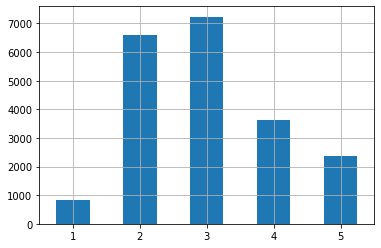

In [14]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True);

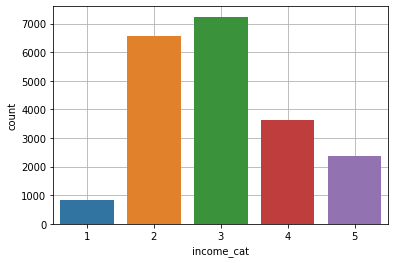

In [15]:
ax = sns.countplot(data=housing, x='income_cat')
ax.set_axisbelow(True)
ax.grid() 

### `train_test_split()` with `stratify` argument

In [16]:
train_set, test_set = train_test_split(housing, 
                                       test_size=0.2, 
                                       random_state=42)

In [17]:
strat_train_set, strat_test_set = train_test_split(housing, 
                                                   test_size=0.2, 
                                                   stratify=housing['income_cat'],
                                                   random_state=42)

In [18]:
full_set = housing['income_cat'].value_counts(normalize=True).sort_index()

In [19]:
trn_set = train_set['income_cat'].value_counts(normalize=True).sort_index()

In [20]:
tst_set = test_set['income_cat'].value_counts(normalize=True).sort_index()

In [21]:
strat_trn_set = strat_train_set['income_cat'].value_counts(normalize=True).sort_index()

In [22]:
str_tst_set = strat_test_set['income_cat'].value_counts(normalize=True).sort_index()

In [23]:
val_counts = pd.concat([full_set.rename('all'),
                        trn_set.rename('train'), 
                        tst_set.rename('test'), 
                        strat_trn_set.rename('st_train'), 
                        str_tst_set.rename('st_test')], 
                       axis=1)

In [24]:
val_counts

,all,train,test,st_train,st_test
1,0.039826,0.039184,0.042393,0.039789,0.039971
2,0.318847,0.321705,0.307413,0.318859,0.318798
3,0.350581,0.351926,0.345203,0.350594,0.350533
4,0.176308,0.174358,0.184109,0.176296,0.176357
5,0.114438,0.112827,0.120882,0.114462,0.114341


### Dropping columns

The `income_cat` column was only created for the purpose of stratifying the data. It is no longer needed so we can drop it. 

In [25]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND,2
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN,4
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN,5
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN,3
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN,3


In [26]:
train_set.shape, test_set.shape, strat_train_set.shape, strat_test_set.shape

((16512, 11), (4128, 11), (16512, 11), (4128, 11))

In [27]:
for set_ in (train_set, test_set, strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [28]:
train_set.shape, test_set.shape, strat_train_set.shape, strat_test_set.shape

((16512, 10), (4128, 10), (16512, 10), (4128, 10))

## Explore and Visualize the Data to Gain Insights

- Put the test set aside and don't peek
- If the data set is too large, consider taking a random sample to use for this stage to make data manipulations easy and fast

In [29]:
explore = strat_train_set.copy()

### Visualizing Geographical Data

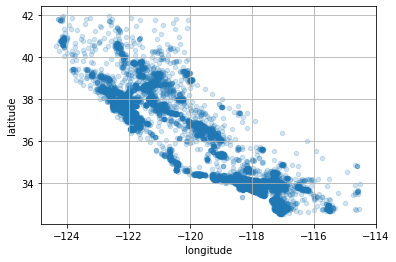

In [30]:
explore.plot(kind="scatter", 
             x="longitude", 
             y="latitude", 
             grid=True, 
             alpha=0.2);

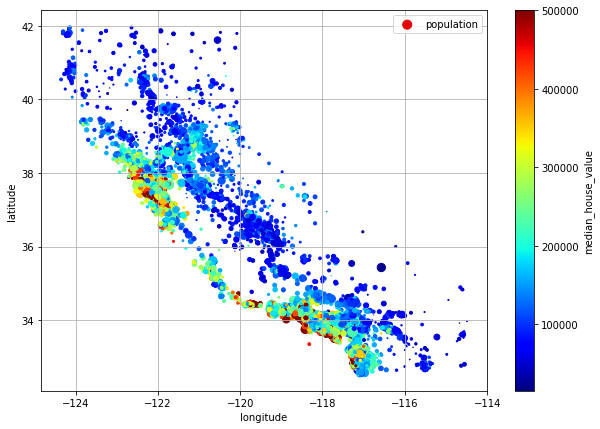

In [31]:
explore.plot(kind='scatter', 
             x='longitude', 
             y='latitude', 
             s = explore['population'] / 100,
             c = 'median_house_value',
             colorbar=True,
             sharex=False, # needed because of c and/or colorbar args
             cmap='jet',
             label='population',
             legend=True,
             figsize=(10, 7),
             grid=True);

### Look for Correlations

In [32]:
corr_matrix = explore.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [33]:
corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


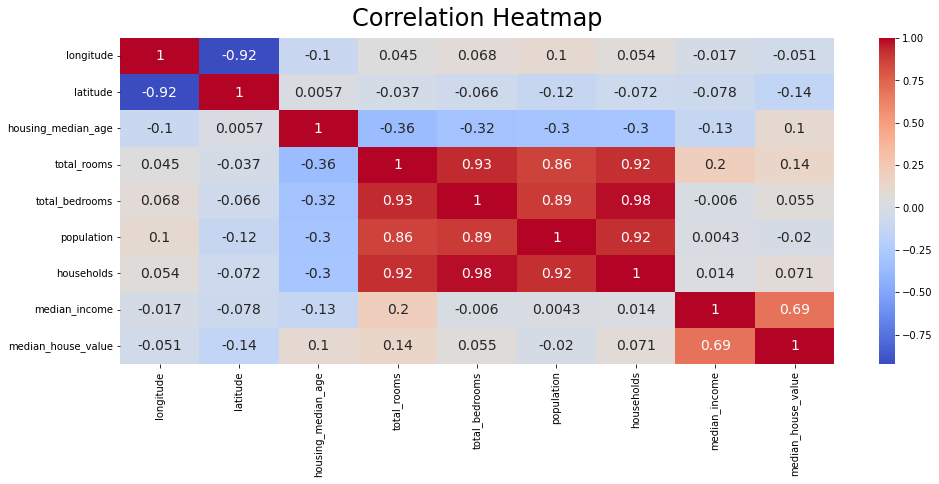

In [34]:
plt.figure(figsize=(16, 6))
htmap = sns.heatmap(corr_matrix, 
                    cmap='coolwarm', 
                    annot=True, 
                    annot_kws={'fontsize': 14});
htmap.set_title('Correlation Heatmap', 
                fontdict={'fontsize':24}, pad=12);

In [35]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
np.fill_diagonal(mask, False)
mask

array([[False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False, False]])

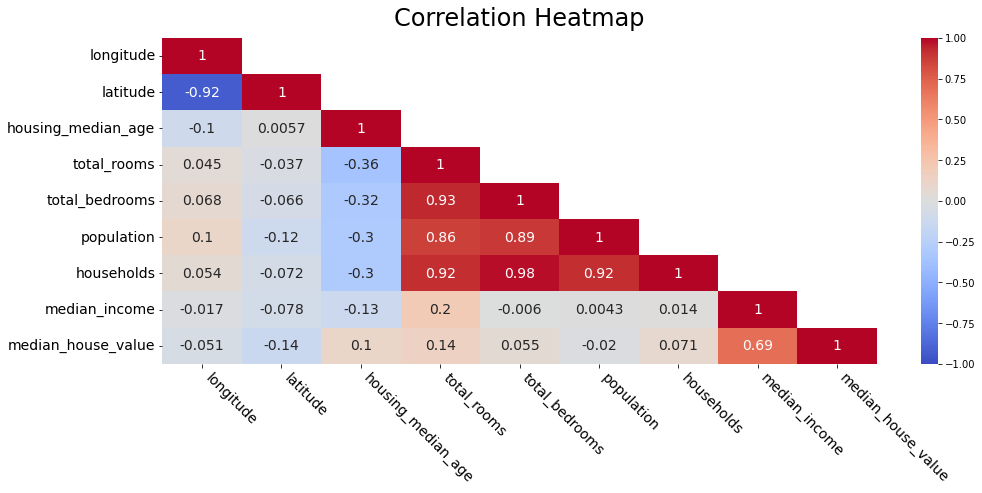

In [36]:
plt.figure(figsize=(16, 6))
htmap = sns.heatmap(corr_matrix, 
                    mask=mask,
                    vmin=-1, 
                    vmax=1, 
                    cmap='coolwarm', 
                    annot=True, 
                    annot_kws={'fontsize': 14});
htmap.set_title('Correlation Heatmap', 
                fontdict={'fontsize':24}, pad=12)
htmap.set_xticklabels(htmap.get_xticklabels(), size=14, rotation=-45, ha='left');
htmap.set_yticklabels(htmap.get_yticklabels(), size=14);


In [37]:
corr_median_house_value = corr_matrix[['median_house_value']].sort_values(by='median_house_value', ascending=False)
corr_median_house_value

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


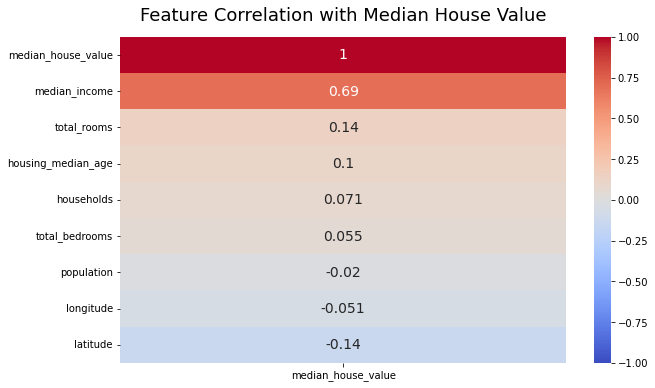

In [38]:
plt.figure(figsize=(10, 6))

htmap = sns.heatmap(corr_median_house_value, 
                    vmin=-1, 
                    vmax=1, 
                    cmap='coolwarm', 
                    annot=True, 
                    annot_kws={'fontsize': 14})
htmap.set_title('Feature Correlation with Median House Value', fontdict={'fontsize': 18}, pad=16);

### The correlation coefficients only measure linear correlations

- Scatter plots can help reveal nonlinear relationships

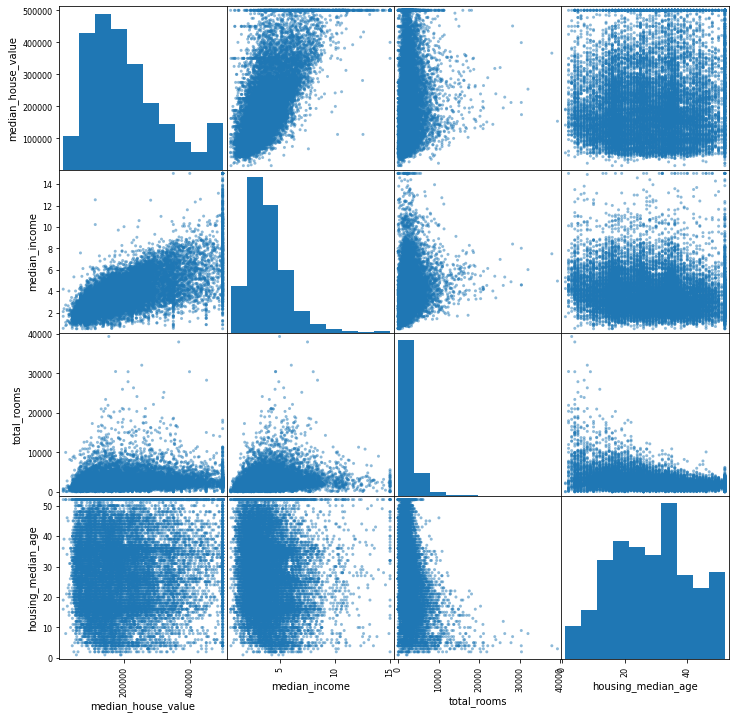

In [39]:
attributes = corr_median_house_value.iloc[:4].index.values

pd.plotting.scatter_matrix(explore[attributes], figsize=(12, 12));

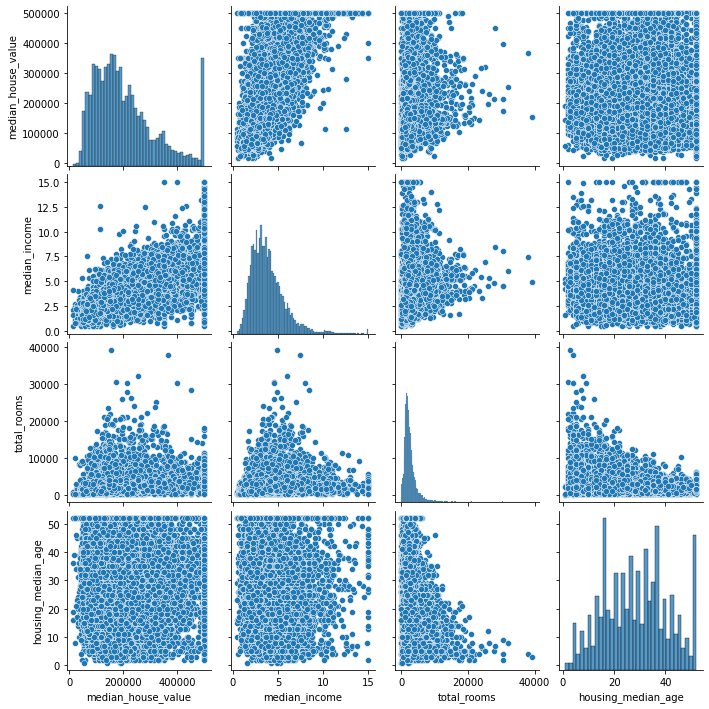

In [40]:
sns.pairplot(explore[attributes])

- It looks like the most promising attribute to predict the `median house value` is `median income`
- The correlation is quite strong
- The price cap discussed earlier is clearly visible as the horiontal line at 500K
- The plot also reveals some other, less obvious horizontal lines
    - It might be a good idea to remove the corresponding districts to prevent your algorithm from learning to reproduce these quirks

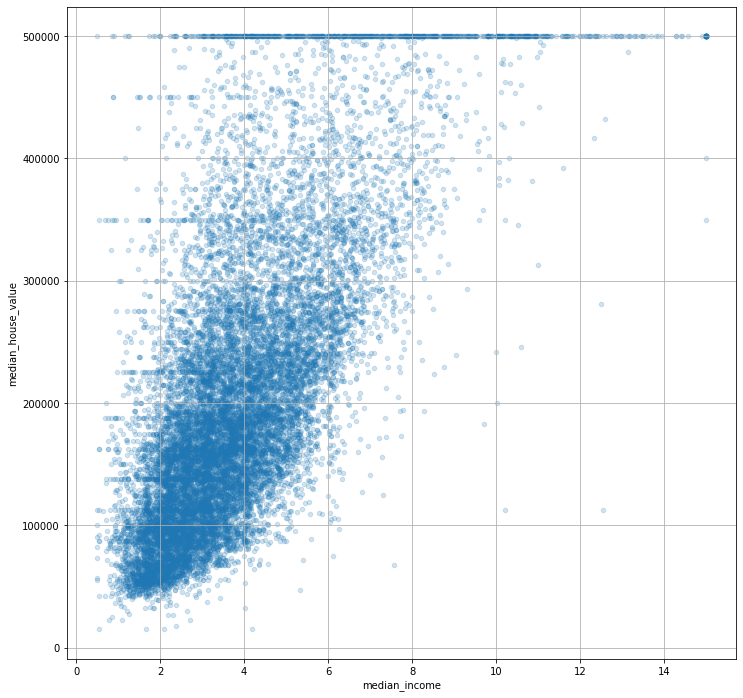

In [41]:
explore.plot(kind='scatter', 
             x='median_income', 
             y='median_house_value', 
             alpha=0.2, 
             grid=True, 
             figsize=(12, 12));

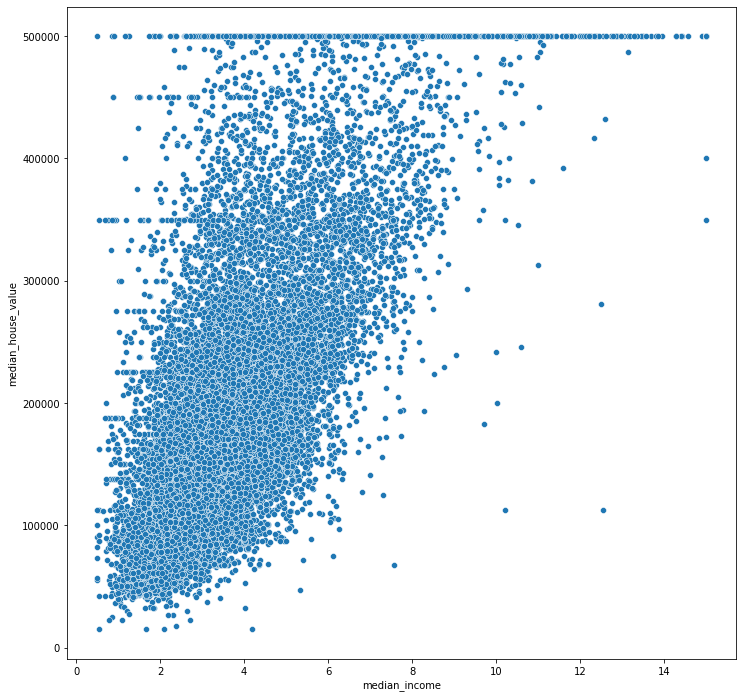

In [42]:
plt.figure(figsize=(12, 12))
sns.scatterplot(data=explore, x='median_income', y='median_house_value');

### Experiment with Attribute Combinations

- The total number of rooms in the district is not very useful if you don't know how many households there are. 
- The number of bedrooms might be more useful it it is compared to the number of rooms
- Population per household might also be useful

In [43]:
explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [44]:
explore['rooms_per_house'] = explore['total_rooms'] / explore['households']
explore['bedrooms_ratio'] = explore['total_bedrooms'] / explore['total_rooms']
explore['people_per_house'] = explore['population'] / explore['households']

In [45]:
explore.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000
mean,-119.573125,35.637746,28.577156,2639.402798,538.949094,1425.513929,499.990189,3.870428,206333.518653,5.441010,0.212796,2.995974
std,2.000624,2.133294,12.585738,2185.287466,423.862079,1094.795467,382.865787,1.891936,115314.047529,2.574143,0.057417,4.457373
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.888889,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.000000,296.000000,787.000000,279.000000,2.562500,119200.000000,4.443636,0.175257,2.433426
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1167.000000,408.000000,3.538500,179200.000000,5.235573,0.203106,2.822316
75%,-118.010000,37.720000,37.000000,3154.000000,645.000000,1726.000000,603.000000,4.750000,263925.000000,6.053843,0.239421,3.286385
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,502.461538


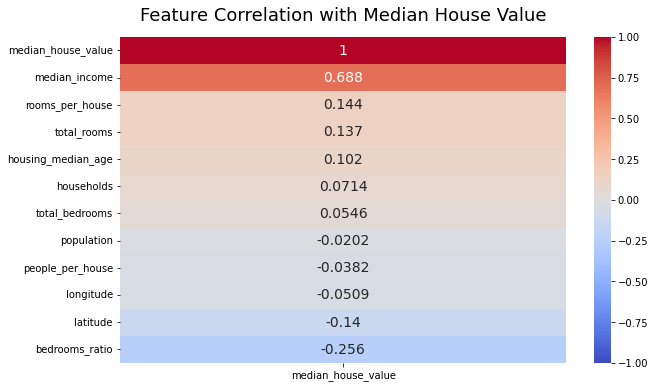

In [46]:
plt.figure(figsize=(10, 6))

htmap = sns.heatmap(explore.corr()[['median_house_value']].sort_values(by='median_house_value', ascending=False), 
                    vmin=-1, 
                    vmax=1, 
                    fmt='.3g',
                    cmap='coolwarm', 
                    annot=True, 
                    annot_kws={'fontsize': 14})
htmap.set_title('Feature Correlation with Median House Value', fontdict={'fontsize': 18}, pad=16);

- The new `bedrooms_ratio` is much more correlated with the median house value than the total number or rooms or bedrooms
    - Houses with a lower bedroom/room ratio tend to be more expensive
- Rooms per house is more informative than the number of rooms in the district


## Prepare the Data for Machine Learning Algorithms

Best done using functions: 

- allows you to reproduce the transformations easily on any dataset
- you will gradually build up a library of transformation functions that you can reuse in future projects
- you can use these functions in your live system to transform the new data before feeding it to your algorithms
- makes it possible to try out various transformations and see which combination of tranformations works best

### Revert to a clean training set and separate the predictors and labels

In [47]:
housing.shape, strat_train_set.shape, strat_test_set.shape

((20640, 11), (16512, 10), (4128, 10))

In [48]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [49]:
housing_labels = strat_train_set['median_house_value'].copy()
housing_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

### Clean the Data

`total_bedrooms` is missing data. Three options for handling this:

1. Gid rid of the corresponding districts
2. Get rid of the who attribute
3. Set the mssing values to some value:
    - zero, the mean, the median, etc. 
    - this is called **imputation**

In [50]:
# 1. Gid rid of the corresponding districts
housing.dropna(subset=['total_bedrooms'], inplace=True)
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16344 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16344 non-null  float64
 1   latitude            16344 non-null  float64
 2   housing_median_age  16344 non-null  float64
 3   total_rooms         16344 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16344 non-null  float64
 6   households          16344 non-null  float64
 7   median_income       16344 non-null  float64
 8   ocean_proximity     16344 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [51]:
# undo that
housing = strat_train_set.drop('median_house_value', axis=1)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [52]:
# 2. Get rid of the whole attribute
housing.drop('total_bedrooms', axis=1, inplace=True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   population          16512 non-null  float64
 5   households          16512 non-null  float64
 6   median_income       16512 non-null  float64
 7   ocean_proximity     16512 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [53]:
# undo that
housing = strat_train_set.drop('median_house_value', axis=1)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [54]:
# 3. Setting the missing values to the median
median = housing['total_bedrooms'].median()
print(median)
housing['total_bedrooms'].fillna(median, inplace=True)
housing.info()

434.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [55]:
# undo that too because we will use the Scikit-learn class: `SimpleImputer`
housing = strat_train_set.drop('median_house_value', axis=1)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### `SimpleImputer`

- the benefit of using this over the Pandas method above, is that it will store the median value (of each feature), which will make it possible to impute missing values not only on the training set, but also on the test set, the validation set and any new data fed to the model
- Three steps:
    1. Create an instance of `SimpleImputer`
    2. `.fit()` it to the data
    3. `.transform()` the data

In [56]:
# 1. create a SimpleImputer instance

imputer = SimpleImputer(strategy='median')

In [57]:
# the imputer can only be computed on numerical attributres
housing_num = housing.select_dtypes(include=[np.number])
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [58]:
# 2. fit the imputer instance to the data
imputer.fit(housing_num)

SimpleImputer(strategy='median')

- The imputer has simply computed the median of each attribute and stored it in its `statistics_` instance variable
- Only the `total_bedrooms` attribute had missing values, but you can't be sure there won't be any missing values in the new data after the system goes love, so it is best to apply the `imputer` to all numerical attributes

In [59]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [60]:
housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2125.0000
total_bedrooms         434.0000
population            1167.0000
households             408.0000
median_income            3.5385
dtype: float64

In [61]:
# 3. Use the "trained" imputer to transform the data
X  = imputer.transform(housing_num)

In [62]:
type(X)

numpy.ndarray

In [63]:
X.shape, housing_num.shape

((16512, 8), (16512, 8))

### Handling Text and Categorical Attributes

In [64]:
housing_cat = housing[['ocean_proximity']]
housing_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ocean_proximity  16512 non-null  object
dtypes: object(1)
memory usage: 258.0+ KB


In [65]:
housing_cat['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [66]:
ordinal_encoder = OrdinalEncoder()

In [67]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [68]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [69]:
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [70]:
# you can get a list of categories
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

- One issue with this representation of categorical variables is that the ML algorithm will assum that two nearby values are more similar that two distant values
- This may be fine for an ordered categorical feature, but this is not the case for `ocean_proximity`
- This problem can be solved with **one-hot encoding**

In [71]:
cat_encoder = OneHotEncoder()

In [72]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [73]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

- A sparse matrix can mostly be used like a normal array, and it saves memory, but it can be converted to a (dense) numpy array if you want to see it
- Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`

In [74]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [75]:
# An alternative is `pd.get_dummies()`
df_test = pd.DataFrame({'ocean_proximity': ['INLAND', 'NEAR BAY', 'ADDITIONA CATEGORY']})
df_test

,ocean_proximity
0,INLAND
1,NEAR BAY
2,ADDITIONA CATEGORY


In [76]:
pd.get_dummies(df_test)

,ocean_proximity_ADDITIONA CATEGORY,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,0,1,0
1,0,0,1
2,1,0,0


In [77]:
# you can get a list of categories
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

- The advantage of `OneHotEncoder` over `pd.get_dummies()` is that it remembers which categories it was trained on
- This is important because when your model is in production, it should be fed exactly the same features that it was trained with: no more, no less

In [78]:
# what happens when our trained `cat_encoder` is used to transform df_test
cat_encoder.handle_unknown = 'ignore' # will throw and exception othewise
cat_encoder.transform(df_test).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.]])

- `OneHotEncoder` has a drop parameter

In [79]:
cat_encoder_drop = OneHotEncoder(drop='first', sparse_output=False)
housing_cat_1hot_drop = cat_encoder_drop.fit_transform(housing_cat)
housing_cat_1hot_drop

array([[0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [80]:
cat_encoder_drop.categories_ 

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [81]:
# Scikit-learn ensures that any DataFrame fed to this estimator
# after it has been trained, as the columns returned by `.feature_names_in`
cat_encoder_drop.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [82]:
cat_encoder_drop.get_feature_names_out()

array(['ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype=object)

In [83]:
# useful for building a DataFrame as shown below
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [84]:
df_test

,ocean_proximity
0,INLAND
1,NEAR BAY
2,ADDITIONA CATEGORY


In [85]:
df_output = pd.DataFrame(cat_encoder.transform(df_test).toarray(),
                         columns = cat_encoder.get_feature_names_out(),
                         index=df_test.index)

df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0


### Feature Scaling and Tranformation

- **Feature scaling** is one of the most important transformations you need to apply to your data
- ML algorithms do not perform well when the numerical features have different scales
- Without scaling, most models will be biased toward ignoring features with smaller scales and focusing on features with larger scales
- There are two common ways to get all the attributes to have the same scale:
    1. min-max scaling: `MinMaxScaler()`
    2. standardization: `StandardScaler()`

In [86]:
# observe the min and max values to see the varied scales
housing_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,-119.573125,35.637746,28.577156,2639.402798,538.949094,1425.513929,499.990189,3.870428
std,2.000624,2.133294,12.585738,2185.287466,423.862079,1094.795467,382.865787,1.891936
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.000000,296.000000,787.000000,279.000000,2.562500
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1167.000000,408.000000,3.538500
75%,-118.010000,37.720000,37.000000,3154.000000,645.000000,1726.000000,603.000000,4.750000
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100
